In [181]:
from textblob import TextBlob
import nltk 
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [182]:
def sentimentAnalyzer(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

In [183]:
def verifyTest():
    assert sentimentAnalyzer("Happy") == "positive"
    assert sentimentAnalyzer("Exciting") == "positive"
    assert sentimentAnalyzer("good") == "positive"
    assert sentimentAnalyzer("rich") == "positive"
    assert sentimentAnalyzer("smile") == "positive"

    assert sentimentAnalyzer("Sad") == "negative"
    assert sentimentAnalyzer("disappointed") == "negative"
    assert sentimentAnalyzer("bad") == "negative"
    assert sentimentAnalyzer("poor") == "negative"
    assert sentimentAnalyzer("anger") == "negative"

    assert sentimentAnalyzer("food") == "neutral"
    assert sentimentAnalyzer("animal") == "neutral"

    print("All tests passed")


verifyTest()


All tests passed


In [184]:
sentimentAnalyzer("love it")

'positive'

In [185]:
blob = TextBlob("Mr.Ben says he love this library. Mr.Ben is a good gentleman.")



In [186]:
blob.sentences

[Sentence("Mr.Ben says he love this library."),
 Sentence("Mr.Ben is a good gentleman.")]

Import Pandas and get the data 

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv("data.csv")

C:\Users\mmahf\AppData\Local\Temp\ipykernel_17724\3477112522.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [189]:
df.head(20)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [190]:
# print uniqe values of column id
print(len(df.id.unique()))
# create a diciotnary uniqe values of column id and their name
id_name = dict(zip(df.id.unique(), df.name.unique()))
# what does zip do?
# zip('ABCD', 'xy') --> Ax By
id_name

42


{'AVqkIhwDv8e3D1O-lebb': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
 'AVqVGZO3nnc1JgDc3jGK': 'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
 'AVpe9CMS1cnluZ0-aoC5': 'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,',
 'AVpfBEWcilAPnD_xTGb7': 'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,',
 'AVqkIiKWnnc1JgDc3khH': 'Kindle Keyboard,,,\r\nKindle Keyboard,,,',
 'AVqkIj9snnc1JgDc3khU': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'AVsRjfwAU2_QcyX9PHqe': 'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
 'AVqVGZNvQMlgsOJE6eUY': 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
 'AVpfwS_CLJeJ

In [191]:
df = df[df.id == "AVqkIdntQMlgsOJE6fuB"]

In [192]:
df.head(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
21246,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-04-08T00:00:00.000Z,2017-09-24T16:56:59Z,"2017-09-03T08:59:09.912Z,2017-08-27T11:15:49.1...",...,True,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5435104/review...,doesnot work After three weeksI cannot open it...,totally deied,NaN,NaN,qingbo
21247,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-05-31T00:00:00.000Z,2017-09-24T16:56:59Z,"2017-09-03T08:59:07.034Z,2017-08-27T11:15:46.3...",...,False,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5435104/review...,This device is a classic reader for people als...,Good reading device,NaN,NaN,peoplebang
21248,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-07-19T00:00:00.000Z,2017-09-24T16:56:59Z,"2017-09-03T08:59:03.719Z,2017-08-27T11:15:41.9...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5435104/review...,I had previously purchased the first kindle fi...,Truly a great way to read books,NaN,NaN,Leilaym
21249,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-08-09T00:00:00.000Z,2017-09-24T16:56:59Z,"2017-09-03T08:59:02.414Z,2017-08-27T11:15:40.9...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5435104/review...,This is a nice reader that we gave to our gran...,Great gift for a child,NaN,NaN,Sunshine
21250,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-09-01T00:00:00.000Z,2017-09-24T16:56:59Z,2017-09-03T08:58:59.452Z,...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5435104/review...,The paperwhite is very similar to a real book....,Nice ereader,NaN,NaN,Honghong
21251,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-09-01T00:00:00.000Z,2017-09-24T16:56:59Z,2017-09-03T08:58:59.452Z,...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5435104/review...,I bough this for my husband and he loves it so...,lOVE IT!!,NaN,NaN,Ashvickers91
21252,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-09-01T00:00:00.000Z,2017-09-24T16:56:59Z,2017-09-03T08:58:59.452Z,...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5435104/review...,I had one of the original Kindles and gave it ...,Excellent e-reader!,NaN,NaN,Stace
21253,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...","841667107868,amazon/53004915,amazonkindlepaper...",Amazon,2017-09-01T00:00:00.000Z,2017-09-24T16:56:59Z,2017-09-03T08:58:59.375Z,...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5435104/review...,Love the Kindle product and the paper white is...,7th Kindle,NaN,NaN,MikeW
21254,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B01BFIBRIE,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...

Cleaning data

In [193]:
df = df.drop(["categories", "asins", "keys", "manufacturer", "reviews.date", "reviews.dateAdded",
                            "reviews.dateSeen", "reviews.didPurchase", "reviews.doRecommend", "reviews.id",
                            "reviews.numHelpful", "reviews.sourceURLs",
                            "reviews.userCity", "reviews.userProvince", "reviews.username", "id"], axis=1)

In [194]:
df.head()

,name,brand,reviews.rating,reviews.text,reviews.title
21246,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,3.0,doesnot work After three weeksI cannot open it...,totally deied
21247,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,This device is a classic reader for people als...,Good reading device
21248,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,I had previously purchased the first kindle fi...,Truly a great way to read books
21249,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,This is a nice reader that we gave to our gran...,Great gift for a child
21250,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,The paperwhite is very similar to a real book....,Nice ereader


In [195]:
print(df.iloc[0]["name"])
print("Number of columns: " + str(len(df.columns)))
print("Number of rows: " + str(len(df.index)))
print("Length of shortest review: " + str(len(min(df["reviews.text"], key=len))))
df.describe()


Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black
Number of columns: 5
Number of rows: 30
Length of shortest review: 54


,reviews.rating
count,30.000000
mean,4.600000
std,0.563242
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [196]:
df.iloc[0]["name"]

'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black'

In [197]:
df.head()

,name,brand,reviews.rating,reviews.text,reviews.title
21246,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,3.0,doesnot work After three weeksI cannot open it...,totally deied
21247,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,This device is a classic reader for people als...,Good reading device
21248,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,I had previously purchased the first kindle fi...,Truly a great way to read books
21249,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,4.0,This is a nice reader that we gave to our gran...,Great gift for a child
21250,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,5.0,The paperwhite is very similar to a real book....,Nice ereader


In [198]:
df['sentiment'] = df['reviews.text'].apply(sentimentAnalyzer)

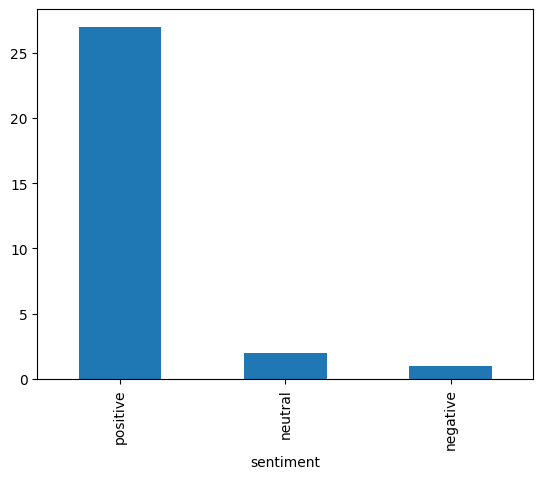

In [199]:
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

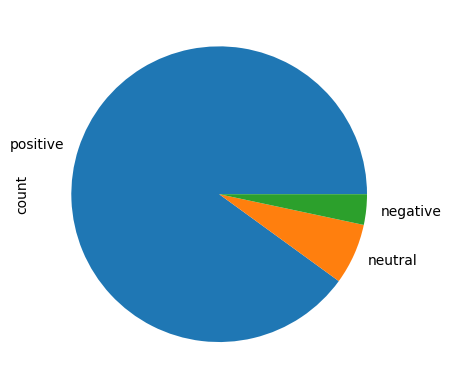

In [200]:
df['sentiment'].value_counts().plot(kind='pie')
plt.show()

In [201]:
print("Negative reviews")
df.loc[df['sentiment'] == 'negative', ['reviews.rating','reviews.title' , 'reviews.text']].head(10)  

Negative reviews


,reviews.rating,reviews.title,reviews.text
21246,3.0,totally deied,doesnot work After three weeksI cannot open it...


In [202]:
print("Positive reviews")
df.loc[df['sentiment'] == 'positive', ['reviews.rating','reviews.title' , 'reviews.text']].head(10)  

Positive reviews


,reviews.rating,reviews.title,reviews.text
21247,5.0,Good reading device,This device is a classic reader for people als...
21248,4.0,Truly a great way to read books,I had previously purchased the first kindle fi...
21249,4.0,Great gift for a child,This is a nice reader that we gave to our gran...
21250,5.0,Nice ereader,The paperwhite is very similar to a real book....
21251,5.0,lOVE IT!!,I bough this for my husband and he loves it so...
21252,5.0,Excellent e-reader!,I had one of the original Kindles and gave it ...
21253,5.0,7th Kindle,Love the Kindle product and the paper white is...
21254,5.0,Easy to use,Very easy to use. It's small enough to fit in ...
21255,5.0,Great product,"Great product we love it, buybuyby good good g..."
21256,5.0,Handy!!!,The battery lasts very long. This saves me so ...


In [203]:
print("Neutral reviews")
df.loc[df['sentiment'] == 'neutral', ['reviews.rating','reviews.title' , 'reviews.text']].head(10)

Neutral reviews


,reviews.rating,reviews.title,reviews.text
21257,5.0,Great for just reading,I got it just for reading text books...great f...
21269,4.0,Great eReader,"El libro electrnico es muy prctico, puedes ten..."


In [204]:
falseNegative = df[(df["reviews.rating"] >= 4) & (df["sentiment"] == "negative")]
falsePositive = df[(df["reviews.rating"] < 3) & (df["sentiment"] == "positive")]

# reset indicies
falseNegative = falseNegative.reset_index(drop=True)
falsePositive = falsePositive.reset_index(drop=True)


falsePositive.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment


In [205]:
falseNegative.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment


We have no false negatives or false positives!
means that I'm ready to submit :)